In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = sns.load_dataset("titanic")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Provide a visualization to communicate the analyses below

## How did survival depend on sex and class?

In [5]:
data.groupby(['sex', 'class']).survived.sum().unstack('sex')

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


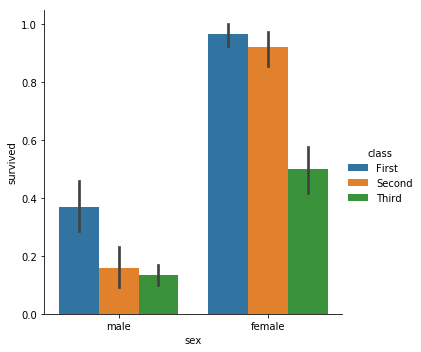

In [12]:
sns.catplot(x='sex', y='survived', kind='bar', hue='class', data=data)

## What was the distribution of passengers in decks

In [14]:
data.groupby(['deck']).age.count()

deck
A    12
B    45
C    51
D    31
E    30
F    11
G     4
Name: age, dtype: int64

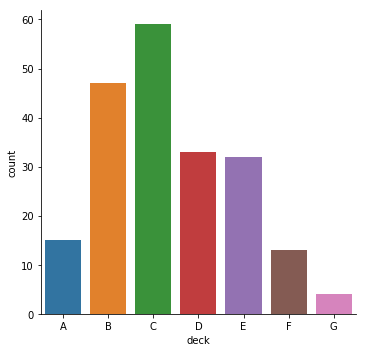

In [17]:
sns.catplot(x='deck', kind='count', data=data)

## Does deck correlate with class?

In [19]:
data.groupby(['deck', 'class']).age.count().unstack('class').fillna(0)

class,First,Second,Third
deck,,,
A,12.0,0.0,0.0
B,45.0,0.0,0.0
C,51.0,0.0,0.0
D,27.0,4.0,0.0
E,24.0,3.0,3.0
F,0.0,8.0,3.0
G,0.0,0.0,4.0


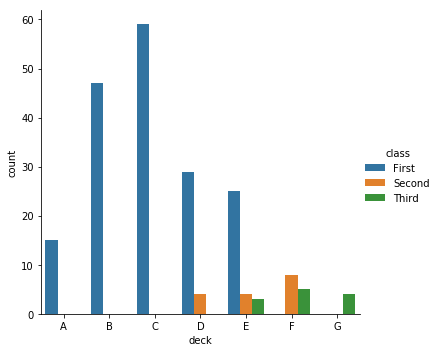

In [20]:
sns.catplot(x='deck', kind='count', hue='class', data=data)

## How did survival depend on deck?

In [21]:
data.groupby(['deck']).survived.mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
Name: survived, dtype: float64

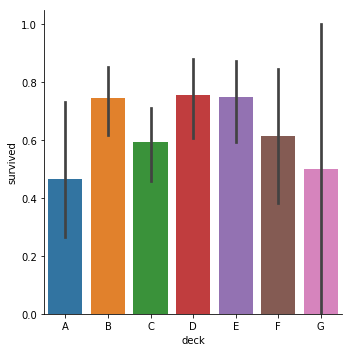

In [26]:
sns.catplot(x='deck', y='survived', kind='bar', data=data)